##  Conv2D

上两个小节我们讨论了使用神经网络模型来实现一个fashin-mnist数据集的图像分类。但是我们看到其结果虽然还可以，但是我们做了很多尝试后，无法再提高识别的精度了，所以这里我们将使用一个在计算机视觉中最常用到的卷积神经来实现该模型。

这里我们需要对卷积神经网络来简单说明一下，就是我们利用一个3x3或者5x5的一个filter来实现。

关于卷积神经网络API [Conv2D](https://tensorflow.google.cn/versions/r1.15/api_docs/python/tf/keras/layers/Conv2D)

>filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).  
kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.  
strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.  
padding: one of "valid" or "same" (case-insensitive).  
data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".  
dilation_rate: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.  
activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).  
use_bias: Boolean, whether the layer uses a bias vector.  
kernel_initializer: Initializer for the kernel weights matrix.  
bias_initializer: Initializer for the bias vector.  
kernel_regularizer: Regularizer function applied to the kernel weights matrix.  
bias_regularizer: Regularizer function applied to the bias vector.  
activity_regularizer: Regularizer function applied to the output of the layer (its "activation")..  
kernel_constraint: Constraint function applied to the kernel matrix.  
bias_constraint: Constraint function applied to the bias vector.



>Input shape:
4D tensor with shape: (samples, channels, rows, cols) if data_format='channels_first' or 4D tensor with shape: (samples, rows, cols, channels) if data_format='channels_last'.


> Output shape:
4D tensor with shape: (samples, filters, new_rows, new_cols) if data_format='channels_first' or 4D tensor with shape: (samples, new_rows, new_cols, filters) if data_format='channels_last'. rows and cols values might have changed due to padding.


In [1]:
import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(test_images.shape)

#step1 将数据reshpae 成4D格式
# samples,W,H,chanels
training_images = training_images.reshape(60000,28,28,1)
# training_images = training_images.reshape(training_images.shape[0],
#                                           training_images.shape[1],
#                                           training_images.shape[2],
#                                           1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.

# 构建模型
model = tf.keras.models.Sequential([
    
    # 构建第一个convolutions网络：
    # filter的个数 一般推荐32的倍数，3x3的size,relu激活函数
    # 一定要输入input data的shape
    tf.keras.layers.Conv2D(64, # filter的个数
                           (3,3), # kenerl 大小
                           activation='relu', #激活函数
                          input_shape=(28,28,1)#输入的数据
                           ),
    # 使用Max pooling 将数据size缩小
    tf.keras.layers.MaxPool2D(2,2),
    # 另一个卷积网络
    tf.keras.layers.Conv2D(64, # filter的个数
                           (3,3), # kenerl 大小
                           activation='relu' #激活函
                        ),
    tf.keras.layers.MaxPool2D(2,2),
    # 将数据拉伸成1D,为了进行DNN做准备
    tf.keras.layers.Flatten(),
    # 第一层 DNN,节点128个
    tf.keras.layers.Dense(128,activation='relu'),
     # 输出层,节点10个
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

model.fit(training_images,training_labels,epochs=5)



1.13.1
(60000, 28, 28)
(10000, 28, 28)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_______________________________

上面的模型种，我们添加了卷积网络层，这我们的精度和loss值都达到一个比较好的水平，提升也比较高。
整个流程如下：

- 将数据reshpae 成4D格式samples,W,H,chanels
-  构建第一个convolutions网络：
    - filter的个数 一般推荐32的倍数，
    - 3x3的size,
    - relu激活函数
    -  一定要输入input data的shape
- Maxpooling:将数据size缩小
- 构建第二个convolutions网络：
- Maxpooling:将数据size缩小
- 将数据拉伸成1D,为了进行DNN做准备
- 第一层 DNN,节点128个
- 输出层,节点10个


### 可视化卷积网络和pool层



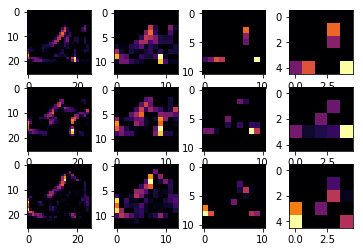

In [15]:

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 62
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)